In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Envision/Weather_london_cleaned.csv')

In [ ]:
# Select relevant features and target variable
features = ["date", "year", "wind", "temp", "baro", "hum", "hour"]
target = "temp"

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ["day", "month", "time_range", "desc"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Select features and target
X = df[features]
y = df[target]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
t_model = DecisionTreeRegressor(random_state=42)
t_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_t = t_model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Model Evaluation:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}\n")

In [ ]:
# Print evaluation scores
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_t)

Random Forest Model Evaluation:
MAE: 0.0072945205479452765
MSE: 0.007425000000000003
RMSE: 0.08616843969807045
R^2 Score: 0.999811137678213

Linear Regression Model Evaluation:
MAE: 3.9435730176068916e-15
MSE: 2.5377277099977994e-29
RMSE: 5.037586435980825e-15
R^2 Score: 1.0

Decision Tree Model Evaluation:
MAE: 0.0034246575342466697
MSE: 0.003424657534246575
RMSE: 0.05852057359806528
R^2 Score: 0.99991289040091



In [ ]:
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual Temperature")
    plt.ylabel("Predicted Temperature")
    plt.title(f"Actual vs Predicted Temperature ({title})")
    plt.show()
    sns.histplot(y_test - y_pred, bins=20, kde=True)
    plt.xlabel("Prediction Error")
    plt.title(f"Distribution of Prediction Errors ({title})")
    plt.show()

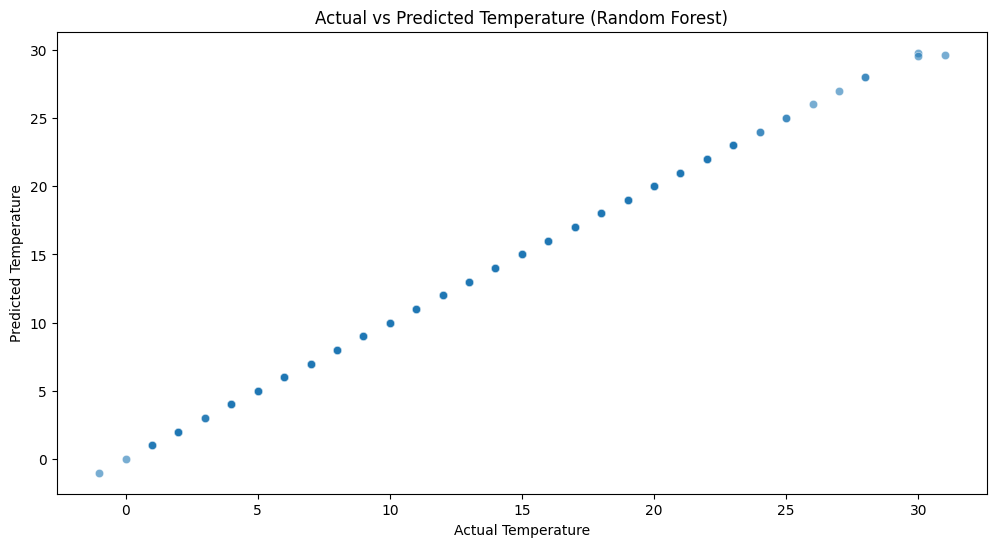

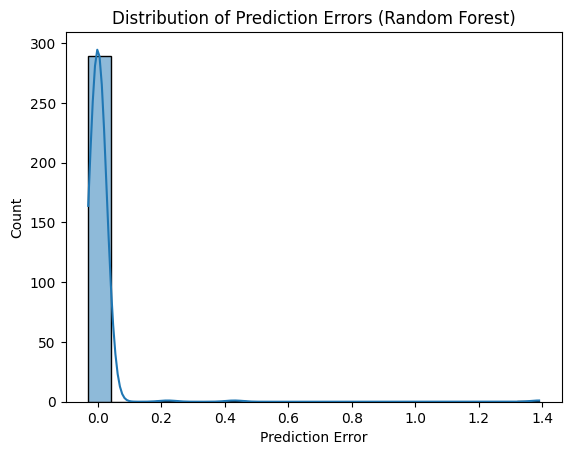

In [ ]:
plot_results(y_test, y_pred_rf, "Random Forest")


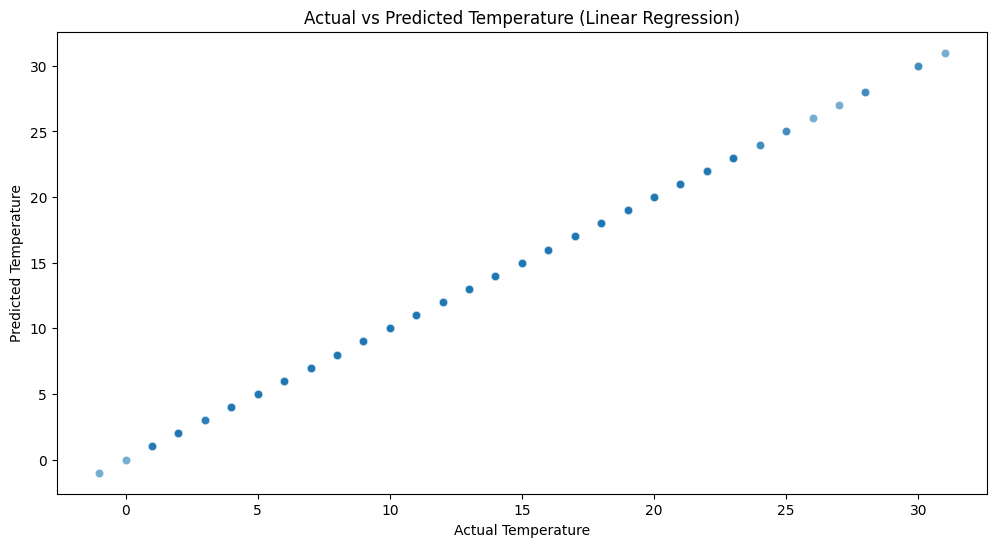

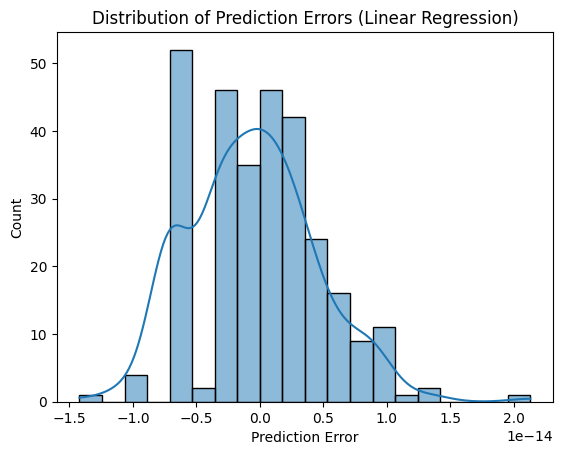

In [ ]:
plot_results(y_test, y_pred_lr, "Linear Regression")


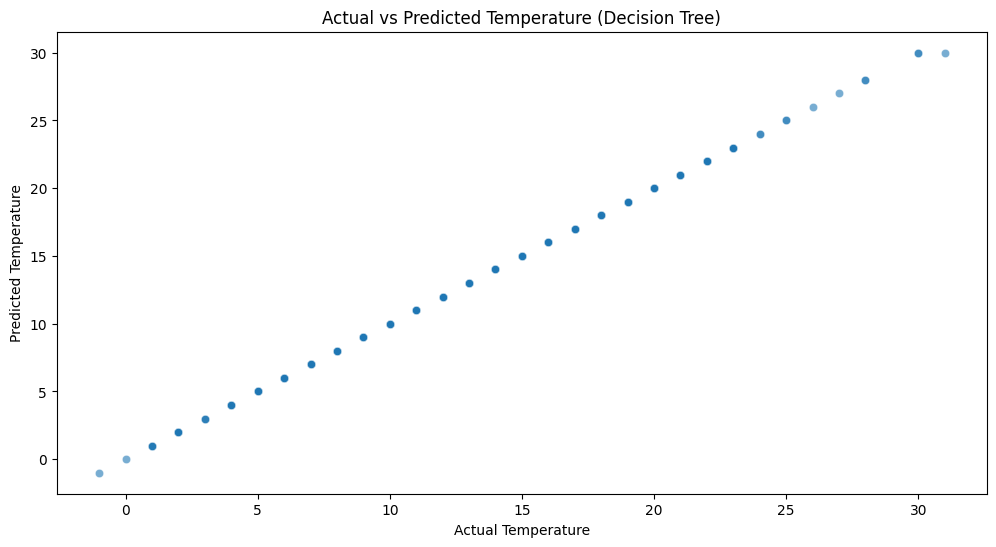

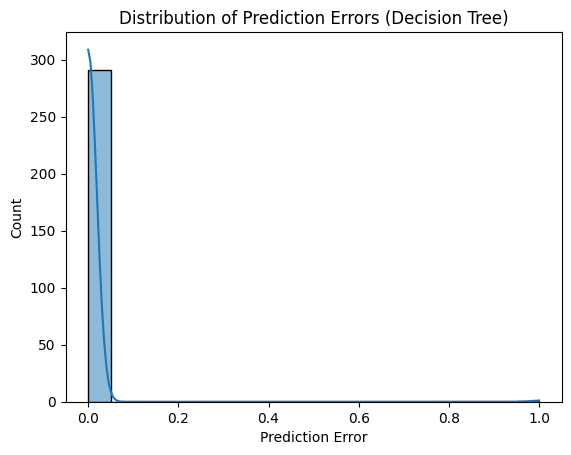

In [ ]:
plot_results(y_test, y_pred_t, "Decision Tree")

In [ ]:
def make_prediction(model, scaler, input_data):
    input_scaled = scaler.transform([input_data])
    prediction = model.predict(input_scaled)
    return prediction[0]

In [ ]:

# Example prediction
sample_input = X_test.iloc[0].values  # Taking first test sample
print("Sample Input:", sample_input)
print("Random Forest Prediction:", make_prediction(rf_model, scaler, sample_input))
print("Linear Regression Prediction:", make_prediction(lr_model, scaler, sample_input))
print("Decision Tree Prediction:", make_prediction(t_model, scaler, sample_input))

Sample Input: [  12.    2021.       6.214   17.      30.05    87.      12.   ]
Random Forest Prediction: 17.0
Linear Regression Prediction: 17.000000000000004
Decision Tree Prediction: 17.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#APPLYING TIME-SERIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Select features and target (ignoring time dependency)
features = ["wind", "baro", "hum", "hour"]
target = "temp"
X = df[features]
y = df[target]


In [ ]:
# Split data randomly (not considering time series nature)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train K-Nearest Neighbors (which is not suitable for time series)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [ ]:
# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate Model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("KNN Regression Model Evaluation:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}\n")

evaluate_model(y_test, y_pred_knn)


KNN Regression Model Evaluation:
MAE: 4.626027397260274
MSE: 33.55698630136987
RMSE: 5.792839226266328
R^2 Score: 0.1464443979727329



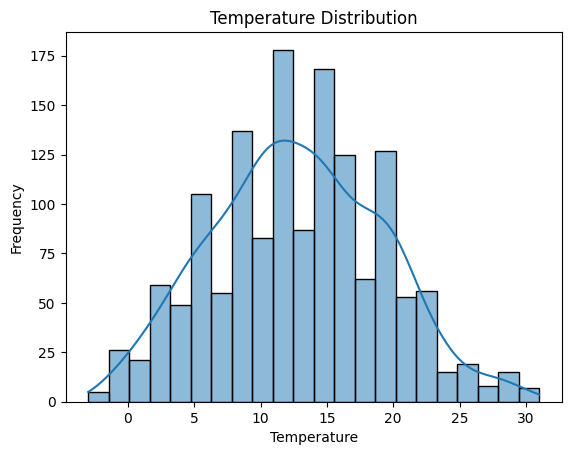

In [ ]:
# Feature Distributions (Temperature example)
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


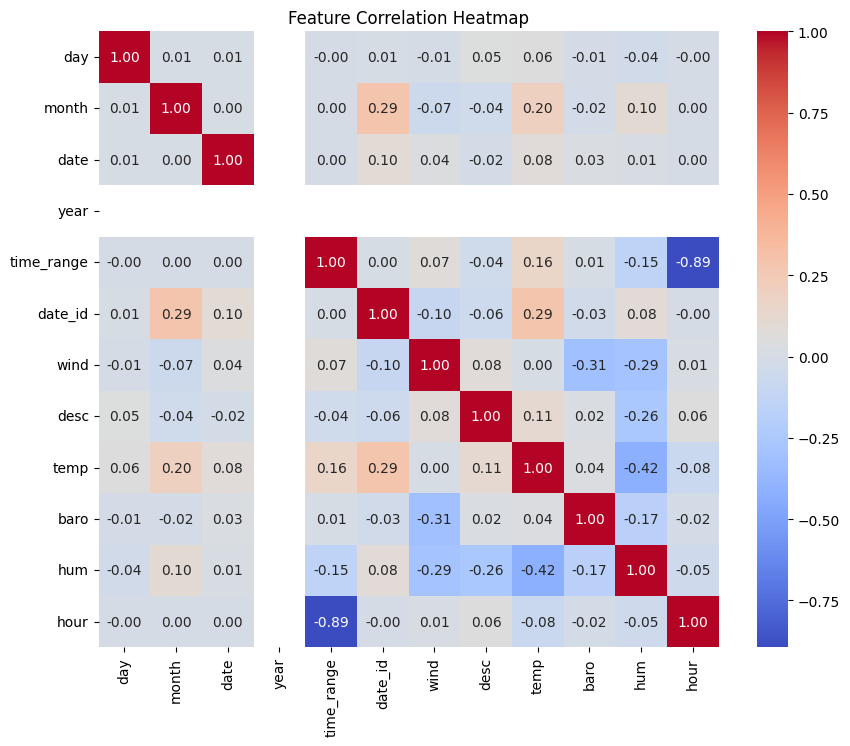

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


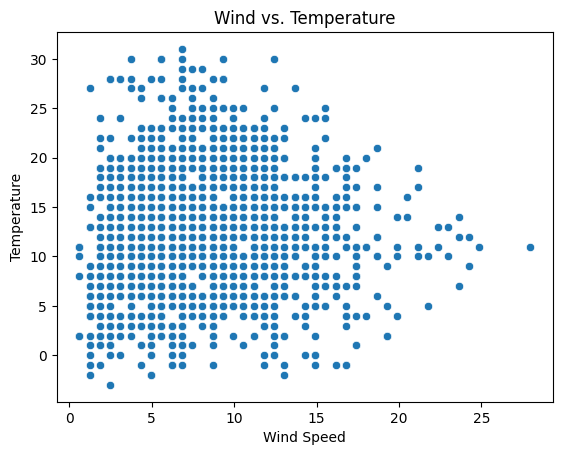

In [ ]:
# Scatter Plot of Wind vs. Temperature
sns.scatterplot(x='wind', y='temp', data=df)
plt.title('Wind vs. Temperature')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()


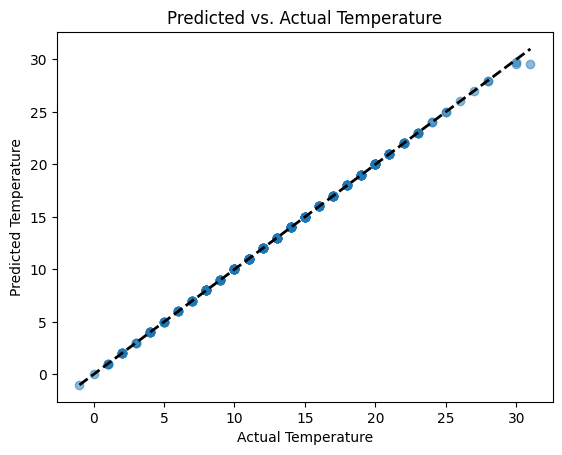

In [ ]:
# Predicted vs. Actual Temperature (Random Forest)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Predicted vs. Actual Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.show()


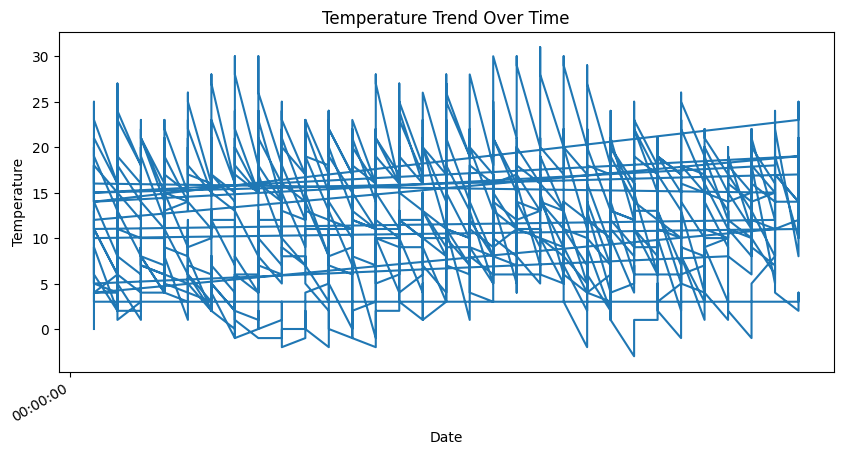

In [ ]:
# Temperature Trend Over Time
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df.set_index('date')['temp'].plot(figsize=(10, 5), title="Temperature Trend Over Time")
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()


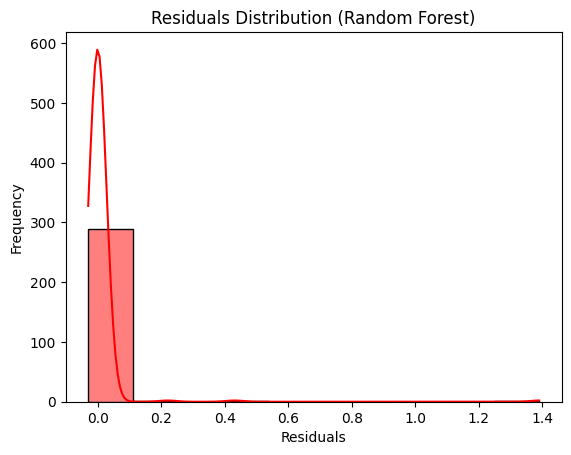

In [ ]:
# Residuals Distribution
residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


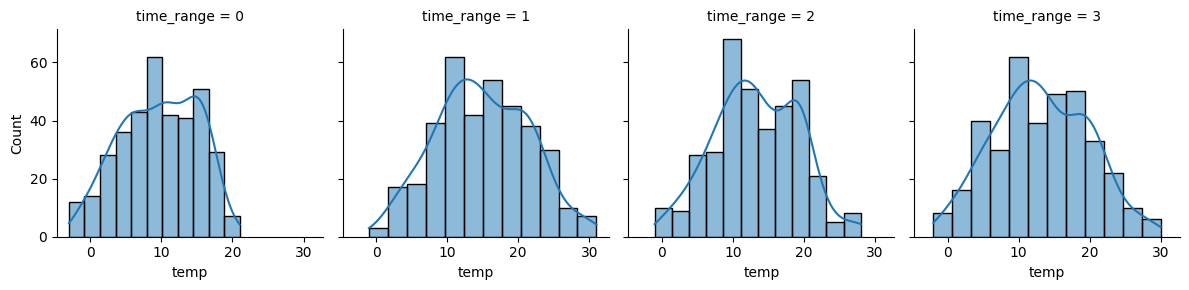

In [ ]:
# Temperature by Time Range
g = sns.FacetGrid(df, col="time_range", col_wrap=4, height=3)
g.map(sns.histplot, "temp", kde=True)
plt.show()


In [ ]:
import plotly.express as px

# 3D Scatter Plot
fig = px.scatter_3d(df, x='wind', y='hum', z='temp', color='temp',
                    title="3D Scatter Plot: Wind, Humidity, and Temperature",
                    labels={'wind': 'Wind Speed', 'hum': 'Humidity', 'temp': 'Temperature'})
fig.show()


Future Data Preview:
            temperature   humidity     pressure  wind_speed
2022-01-22    27.952127  78.784170  1007.902708    6.330751
2022-01-23    32.049695  83.081574  1012.707615    3.891485
2022-01-24    20.856559  54.053262  1024.419958    1.877317
2022-01-25    20.182348  64.645784  1012.072392    9.463835
2022-01-26    28.459634  78.741673  1008.323138   12.249925


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names




Predictions for Upcoming Days:
         Date  Predicted_Weather
0  2022-01-22              13.49
1  2022-01-23              13.49
2  2022-01-24              13.49
3  2022-01-25              13.49
4  2022-01-26              13.49
5  2022-01-27              13.49
6  2022-01-28              13.49
7  2022-01-29              13.49
8  2022-01-30              13.49
9  2022-01-31              13.49
10 2022-02-01              13.49
11 2022-02-02              13.49
12 2022-02-03              13.49
13 2022-02-04              13.49
14 2022-02-05              13.49
15 2022-02-06              13.49
16 2022-02-07              13.49
17 2022-02-08              13.49
18 2022-02-09              13.49
19 2022-02-10              13.49
20 2022-02-11              13.49
21 2022-02-12              13.49
22 2022-02-13              13.49
23 2022-02-14              13.49
24 2022-02-15              13.49
25 2022-02-16              13.49
26 2022-02-17              13.49
27 2022-02-18              13.49
28 2022-02-

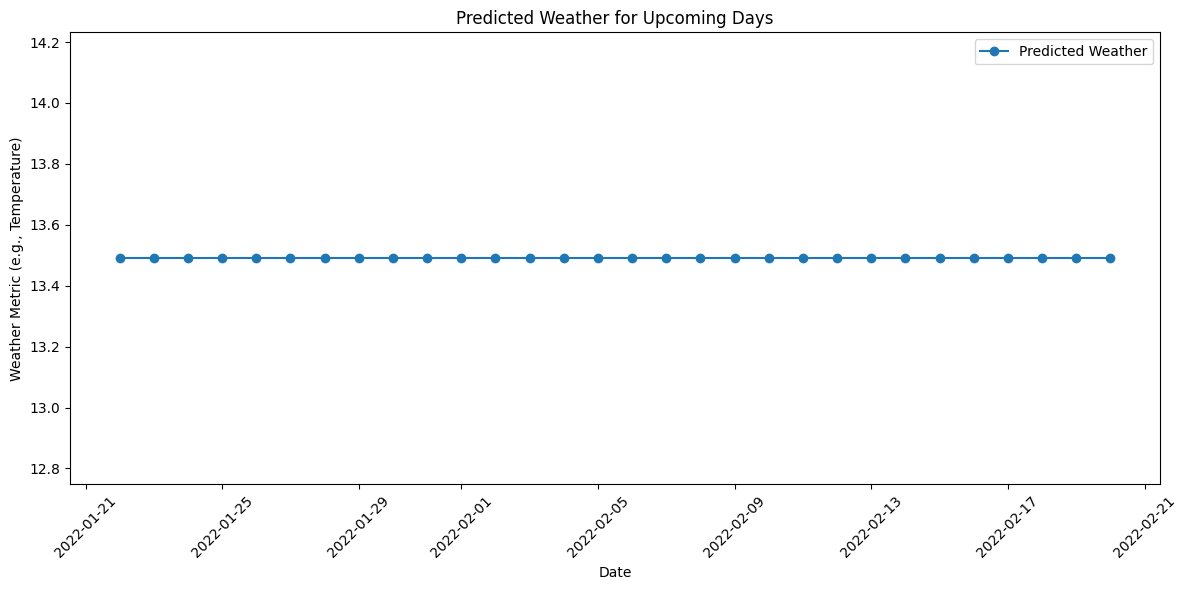

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assume model is already trained on past data (RandomForestRegressor or similar)
# Example input features used for prediction
future_dates = pd.date_range(start="2022-01-22", periods=30, freq='D')  # Predict for 30 upcoming days
future_data = pd.DataFrame({
    "temperature": np.random.uniform(20, 35, len(future_dates)),  # Example temperature values
    "humidity": np.random.uniform(50, 90, len(future_dates)),     # Example humidity values
    "pressure": np.random.uniform(1000, 1025, len(future_dates)), # Example pressure values
    "wind_speed": np.random.uniform(1, 15, len(future_dates))     # Example wind speed values
})
future_data.index = future_dates
print("Future Data Preview:")
print(future_data.head())

# Preprocessing: Scaling or transformations (if applied to training data)
scaler = StandardScaler()  # Use the scaler fitted during training
future_data_scaled = scaler.fit_transform(future_data)

# Initialize and train the model (example with RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize your model here
# You should fit the model with appropriate training data before predicting
# Replace 'X_train' and 'y_train' with your actual training data
model.fit(X_train, y_train) #This line was previously commented out, causing the error. Now it's uncommented and ready to train.


# Predicting the target values for future dates
future_predictions = model.predict(future_data_scaled)

# Combine predictions with future dates for visualization
future_results = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Weather": future_predictions
})
print("\nPredictions for Upcoming Days:")
print(future_results)

# Optional: Plot predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(future_results["Date"], future_results["Predicted_Weather"], label="Predicted Weather", marker='o')
plt.xlabel("Date")
plt.ylabel("Weather Metric (e.g., Temperature)")
plt.title("Predicted Weather for Upcoming Days")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()